In [1]:
%config Completer.use_jedi = False

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns 
import collections
import matplotlib.pyplot as plt

In [3]:
H=nx.read_gml('Author_keywords707.gml')

In [4]:
H.number_of_edges()

1851

In [5]:
H.number_of_nodes()

707

# Fluid clustering

In [6]:
from cdlib.algorithms import async_fluid

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'graph_tool', 'karateclub'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'leidenalg'}


In [7]:
coms11 = async_fluid(H,k=9)

In [8]:
[len(i) for i in coms11.communities]

[127, 92, 91, 88, 84, 73, 53, 52, 47]

In [10]:
H.nodes(data=True)

NodeDataView({'organoclay': {'freq': 6}, 'quality': {'freq': 4}, 'seed dust-off': {'freq': 2}, 'cellulose and other wood products': {'freq': 3}, 'ocean': {'freq': 4}, 'soil temperature': {'freq': 5}, 'elastomer': {'freq': 25}, 'nanoclay': {'freq': 10}, 'bacterial consortium': {'freq': 6}, 'toxicity': {'freq': 21}, 'gut bacteria': {'freq': 4}, 'vector': {'freq': 3}, 'biodegradable gillnet': {'freq': 2}, 'silk fibroin nanoparticles': {'freq': 2}, 'industrial ecology': {'freq': 3}, 'tissue engineering': {'freq': 33}, 'bacillus licheniformis': {'freq': 4}, 'degradation': {'freq': 161}, 'food packaging': {'freq': 17}, 'flax fibers': {'freq': 6}, 'landfill': {'freq': 32}, 'hydroxyl radicals': {'freq': 3}, 'surface treatment': {'freq': 6}, 'low-density polyethylene (ldpe)': {'freq': 33}, 'differential scanning calorimetry (dsc)': {'freq': 6}, 'biobased': {'freq': 10}, 'rt-pcr dgge': {'freq': 6}, 'polycyclic aromatic hydrocarbons': {'freq': 4}, 'soil microorganisms': {'freq': 5}, 'in vitro deg

# WordCloud

In [215]:
from wordcloud import WordCloud

In [216]:
f={i[0]:i[1]['freq'] for i in H.nodes(data=True)}

In [217]:
f100=sorted(f.items(), key=lambda x:x[1],reverse=True)[:100]

In [218]:
wc = WordCloud(background_color="white", max_words=1000,width=1200,height=1000)

In [219]:
wc.generate_from_frequencies(frequencies=dic_f100)

(-0.5, 1199.5, 999.5, -0.5)

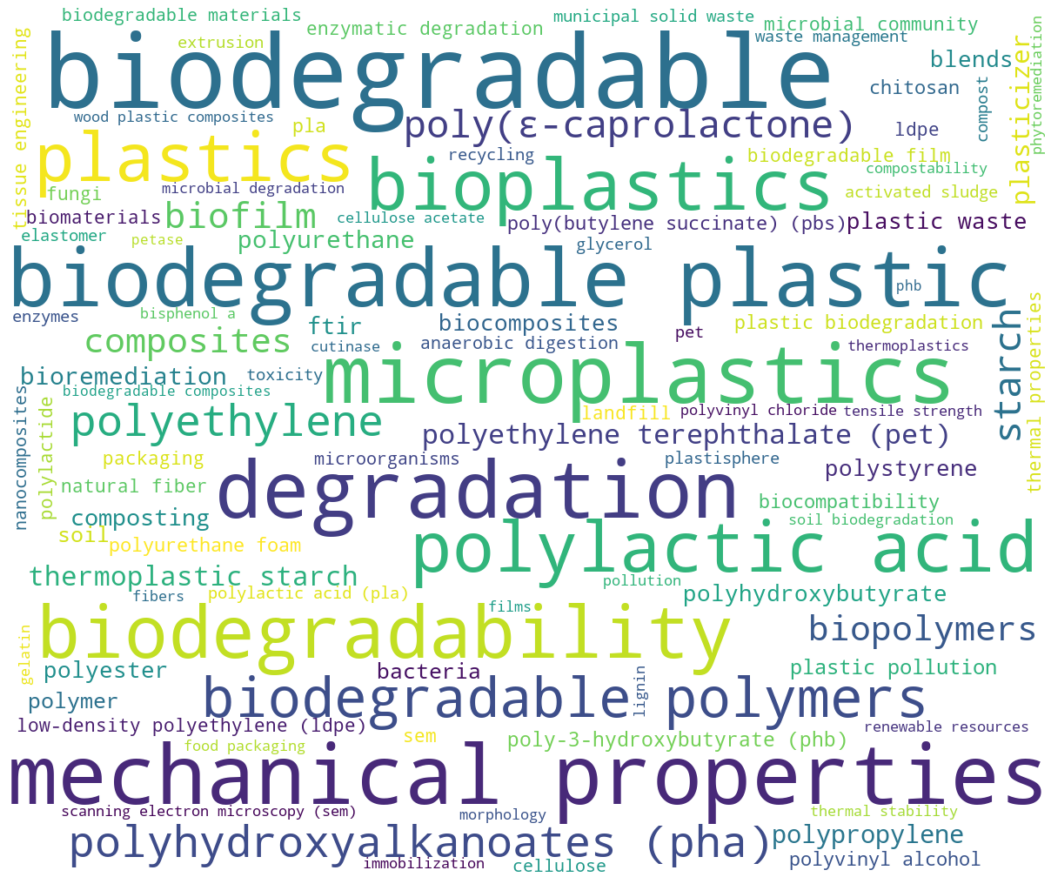

In [221]:
plt.figure( figsize=(20,16) )
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#plt.savefig('total_keyword_author.jpeg',dpi=600)

In [222]:
keywords=[]
for i in coms11.communities:
    cos=[]
    for j in  i:
        cos.append(j)
    keywords.append(cos) 

In [223]:
com1={}
for i in keywords[0]:
    com1.update({i:f[i]})

In [224]:
com1_=sorted(com1.items(), key=lambda x:x[1],reverse=True)[:15]

In [225]:
dic_com1={i:j for i,j in com1_}

In [226]:
wc.generate_from_frequencies(frequencies=dic_com1)

(-0.5, 1199.5, 999.5, -0.5)

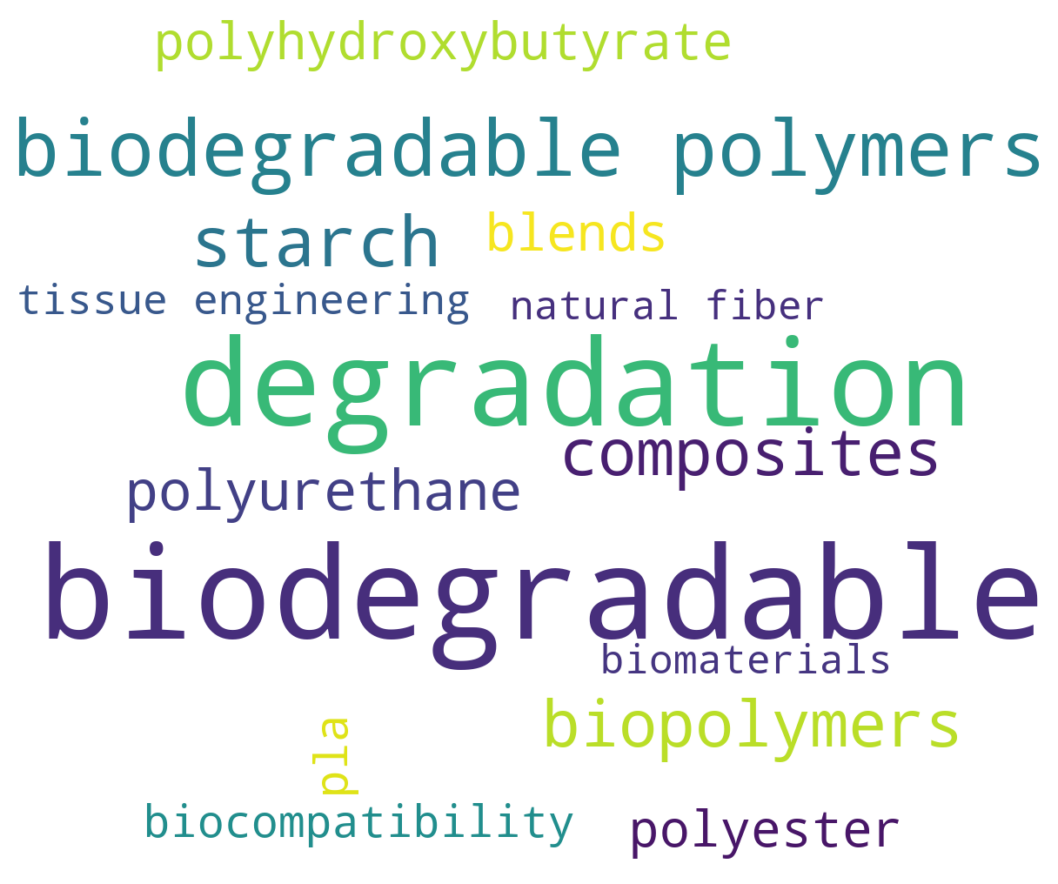

In [227]:
plt.figure( figsize=(20,16) )
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#plt.savefig('total_keyword_author.jpeg',dpi=600)

## word cloud does not give clear picture and it is difficult to compare between different community

In [228]:
[i for i in range(10,110,10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [229]:
p=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [232]:
f100_=[[j[0],j[1],i] for i,j in enumerate(f100)]

In [233]:
f100_p=[]
for i in f100_:
    for j,k in enumerate(p):
        if i[2]<k:
            i.append(j+1)
            f100_p.append(i)
            break

In [234]:
f100_p

[['biodegradable', 187, 0, 1],
 ['mechanical properties', 177, 1, 1],
 ['microplastics', 173, 2, 1],
 ['biodegradable plastic', 165, 3, 1],
 ['degradation', 161, 4, 1],
 ['biodegradability', 131, 5, 1],
 ['bioplastics', 125, 6, 1],
 ['polylactic acid', 125, 7, 1],
 ['plastics', 120, 8, 1],
 ['biodegradable polymers', 111, 9, 1],
 ['polyhydroxyalkanoates (pha)', 101, 10, 2],
 ['polyethylene', 100, 11, 2],
 ['poly(ε-caprolactone)', 87, 12, 2],
 ['starch', 87, 13, 2],
 ['biofilm', 77, 14, 2],
 ['biopolymers', 75, 15, 2],
 ['composites', 74, 16, 2],
 ['polyethylene terephthalate (pet)', 69, 17, 2],
 ['thermoplastic starch', 65, 18, 2],
 ['plasticizer', 60, 19, 2],
 ['polypropylene', 56, 20, 3],
 ['polyurethane', 54, 21, 3],
 ['bioremediation', 53, 22, 3],
 ['composting', 51, 23, 3],
 ['ftir', 51, 24, 3],
 ['polystyrene', 47, 25, 3],
 ['plastic waste', 47, 26, 3],
 ['blends', 47, 27, 3],
 ['polyhydroxybutyrate', 47, 28, 3],
 ['biocomposites', 46, 29, 3],
 ['polyester', 45, 30, 4],
 ['polyme

In [235]:
dic_f100_p={j[0]:[j[1],j[3]] for i,j in enumerate(f100_p)}

In [236]:
y_p=[]
for i in range(16):
    y_p.append(i/16)

In [237]:
y_p=y_p[1:]

(0.0, 1.0, 0.0, 1.0)

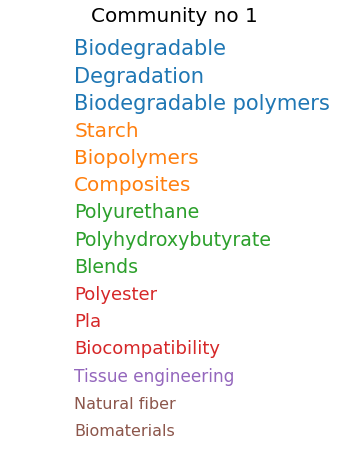

In [238]:
fig, ax = plt.subplots(figsize=(6, 8))
for i in range(15):
    plt.text(.2, y_p[14-i], str(com1_[i][0]).capitalize(), fontsize =22-dic_f100_p[com1_[i][0]][1], color = sns.color_palette().as_hex()[dic_f100_p[com1_[i][0]][1]-1])
ax.set_title('Community no {}'.format(1),fontsize=20) 
ax.axis("off") 

In [239]:
import matplotlib.patches as mpatches

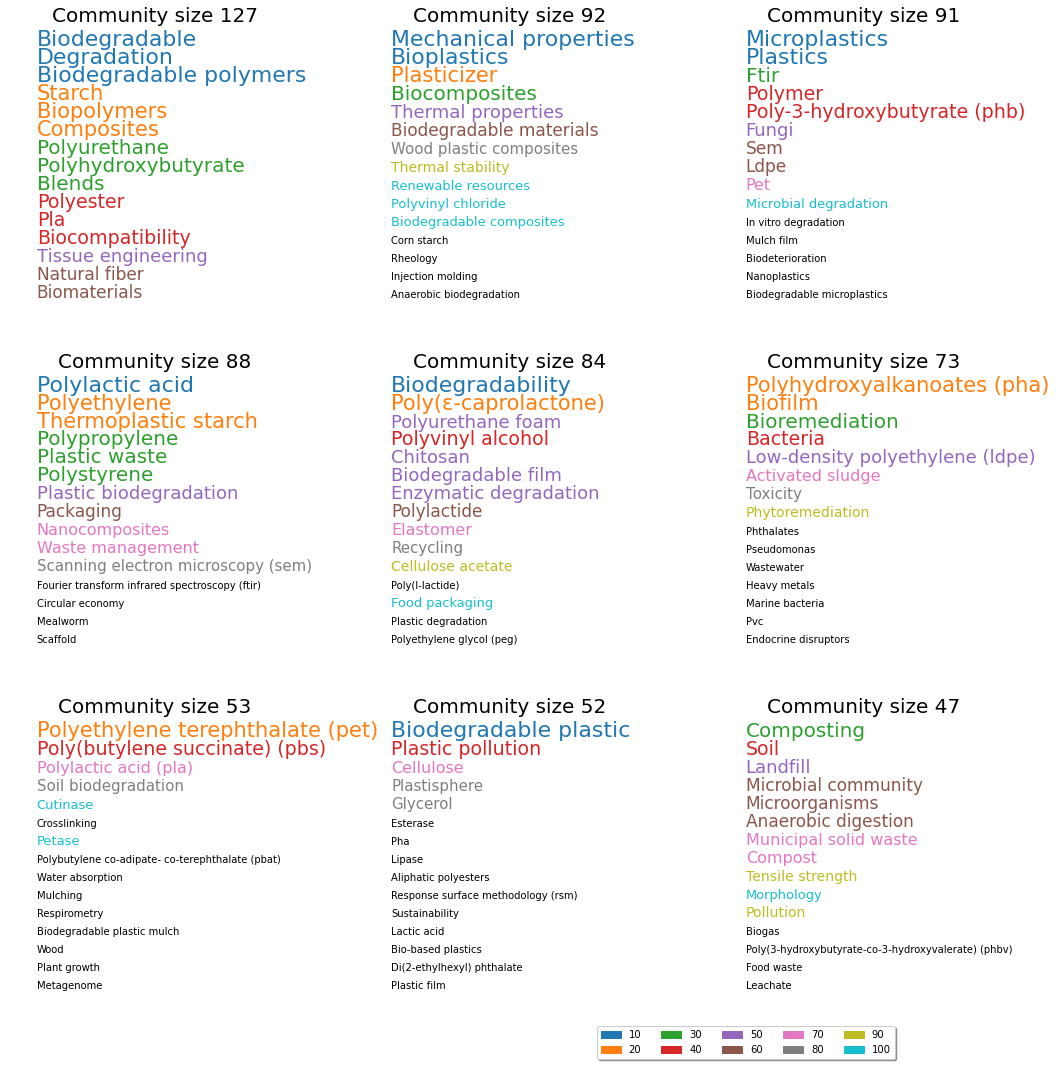

In [240]:
fig,axs = plt.subplots(nrows=3, ncols=3, sharex=True,figsize=(18, 18))
for i,ax in enumerate(axs.flat):
    com={}
    for j in keywords[i]:
        com.update({j:f[j]})
    com_=sorted(com.items(), key=lambda x:x[1],reverse=True)[:15]    
    com_c=[]
    com_f=[]
    for k in  com_:
        try:
            com_c.append(sns.color_palette().as_hex()[dic_f100_p[k[0]][1]-1])
            com_f.append(23-dic_f100_p[k[0]][1])
        except: 
            com_c.append('black')
            com_f.append(10)
    for l in range(15):        
        ax.text(.1, y_p[14-l], str(com_[l][0]).capitalize(), fontsize =com_f[l], color =com_c[l])
    ax.axis("off")
    ax.set_title('Community size {}'.format(len(com)),fontsize=20)
#blue_patch = mpatches.Patch(color='blue', label='blue')
patch=[mpatches.Patch(color=sns.color_palette().as_hex()[i], label=10*(i+1)) for i in range(10)]
#plt.legend(handles=patch,loc='low right') 
#box=plt.get_position()
#fig.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
plt.legend(handles=patch,loc='upper center', bbox_to_anchor=(0.1, -0.05),
          fancybox=True, shadow=True, ncol=5)
#fig.savefig('community_top15.jpeg',dpi=300)